<a href="https://colab.research.google.com/github/adi-103/Automatidata_Project/blob/main/Automatidata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOMATIDATA**

##**Project goal:**  
In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.

##**Business scenario and problem:**
You are a newly-hired data professional at Automatidata, a fictional data consulting firm. Automatidata’s focus is to help clients transform their unused and stored data into useful solutions. In this scenario, you will consult with The New York City Taxi & Limousine Commission to develop an app that will help users (TLC riders) estimate their taxi fares before their ride.

The team is still in the early stages of the project. Previously, you were asked to complete a project proposal by your supervisor, DeShawn Washington. You have received notice that your project proposal has been approved and that New York City TLC has given the Automatidata team access to their data. To get clear insights, New York TLC's data must be analyzed, key variables identified, and the dataset ensured it is ready for analysis.

# **PACE stages**


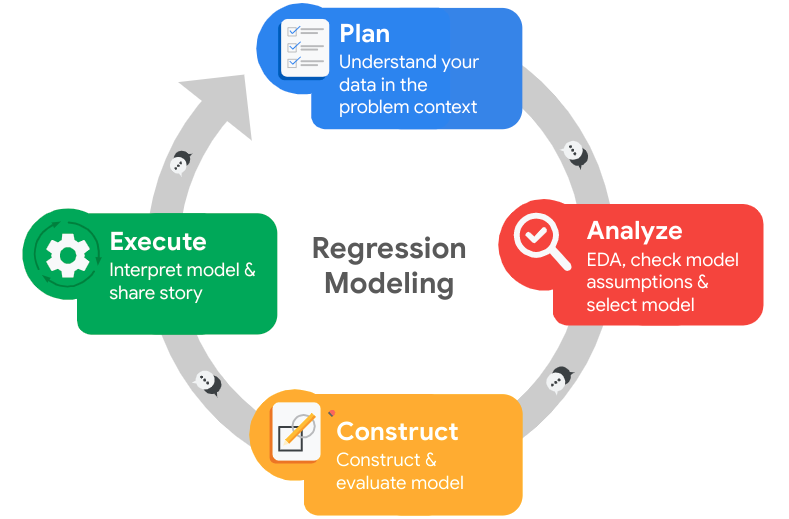

##**Understand the Data**

**The purpose** of this project is to investigate and understand the data provided.
  
**The goal** is to use a dataframe constructed within Python, perform a cursory inspection of the provided dataset, and inform team members of your findings.

*This phase has three parts:*

**Part 1: Understand the situation**
* Prepare to understand and organize the provided taxi cab dataset and information.

**Part 2: Understand the data**

* Create a pandas dataframe for data learning, future exploratory data analysis (EDA), and statistical activities.

* Compile summary information about the data to inform next steps.

**Part 3: Understand the variables**

* Use insights from your examination of the summary data to guide deeper investigation into specific variables.

**About Dataset**

The dataset contains:

**408,294 rows** – each row represents a different trip

**18 columns**


Variable  |Description |
-----|-----|
ID|Trip identification number|
VendorID|A code indicating the TPEP provider that provided the record [1= Creative Mobile Technologies, LLC ; 2= VeriFone Inc]|
tpep_pickup_datetime|The date and time when the meter was engaged|
tpep_dropoff_datetime|The date and time when the meter was disengaged|
Passenger_count|The number of passengers in the vehicle. This is a driver-entered value
Trip_distance|The elapsed trip distance in miles reported by the taximeter
PULocationID|TLC Taxi Zone in which the taximeter was engaged
DOLocationID|TLC Taxi Zone in which the taximeter was disengaged
RateCodeID|The final rate code in effect at the end of the trip [1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride]
Store_and_fwd_flag| This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server [Y= store and forward trip, N= not a store and forward trip]
Payment_type|A numeric code signifying how the passenger paid for the trip [1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip]
Fare_amount|The time-and-distance fare calculated by the meter
Extra|Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges
MTA_tax|\$0.50 MTA tax that is automatically triggered based on the metered rate in use
Improvement_surcharge|$0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015
Tip_amount|This field is automatically populated for credit card tips. Cash tips are not included
Tolls_amount|Total amount of all tolls paid in trip
Total_amount|The total amount charged to passengers. Does not include cash tips.

**Import Files from Google Drive to Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 1: Imports**

* Import packages
* Load dataset: Pandas is used to read a dataset called 2017_Yellow_Taxi_Trip_Data.csv.

In [ ]:
# Import packages

# For numerics + dataframes
import numpy as np
import pandas as pd

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For date conversions
import datetime as dt
from datetime import datetime
from datetime import date
from datetime import timedelta

# Scikit-learn functions for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Packages for OLS
# Scikit-learn functions for data-modeling
# Constructing Linear regression, Random Forest, and XGBoost
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# Scikit-learn functions for evaluation of metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load dataset into a dataframe
df = pd.read_csv('/content/drive/MyDrive/2017_Yellow_Taxi_Trip_Data.csv')

**Step 2: Understand the data - Inspect the data**

View and inspect summary information about the dataframe
1. `df.head()`
2. `df.info()`
3. `df.describe()`

In [ ]:
# Display first few rows of the dataframe
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [ ]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
# Gather descriptive statistics about the data
df.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


**Step 3: Understand the data - Investigate the variables**

Sort and interpret the data table for two variables: `trip_distance` and `total_amount`.

In [ ]:
# Sort the data by trip distance from maximum to minimum value
df.sort_values(by=['trip_distance'], ascending=False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [ ]:
# Sort the data by total amount and print the top 20 values
total_amount_sorted = df.sort_values(['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [ ]:
# Sort the data by total amount and print the bottom 20 values
total_amount_sorted.tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [ ]:
# How many of each payment type are represented in the data?
print(df['payment_type'].value_counts())

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64


**According to the data dictionary, the payment method was encoded as follows:**

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [ ]:
# Average tip for trips paid for with credit card
credit_card = df[df['payment_type'] == 1]['tip_amount'].mean()
print(credit_card)

2.7298001965280054


In [ ]:
# Average tip for trips paid for with cash
cash = df[df['payment_type'] == 2]['tip_amount'].mean()
print(cash)

0.0


In [ ]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [ ]:
# What is the mean total amount for each vendor?
df.groupby('VendorID')['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

In [ ]:
# Filter the data for credit card payments only
cc = df[df['payment_type'] == 1]

In [ ]:
# Filter the credit-card-only data for passenger count only
cc['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

**Note:** The two most important variables that will prove to help build a predictive model are:

`trip_distance`   
`total_amount`  

By building a predictive model based on these two variables will help the users predict their taxi fare in advance of their ride.

##**Exploratory data analysis**

The management team is asking for a Python notebook showing data structuring and cleaning and any matplotlib/seaborn visualisations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

Examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story and will help data-driven decisions for business needs.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began and perform further EDA on this data to learn more about the variables.
  
**The goal** is to clean data set and create a visualization.

*This phase has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

**(Visualize a story in Tableau and Python)**

In [ ]:
# Size of the dataframe
df.size

408582

**Step 1: Convert date columns to datetime**

In [ ]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Check the datatype for all the columns
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

**Step 2: Data visualization**

The data has been assessed and decided which data variables are most applicable. It’s time to plot visualization(s)!

Some of the best ways to identify the presence of outliers in data are box plots and histograms.

**Boxplots**

Perform a check for outliers on relevant columns such as `trip distance` and `trip duration`.

*Note: date columns must be converted to datetime to derive total trip duration.*  

**Trip_distance**

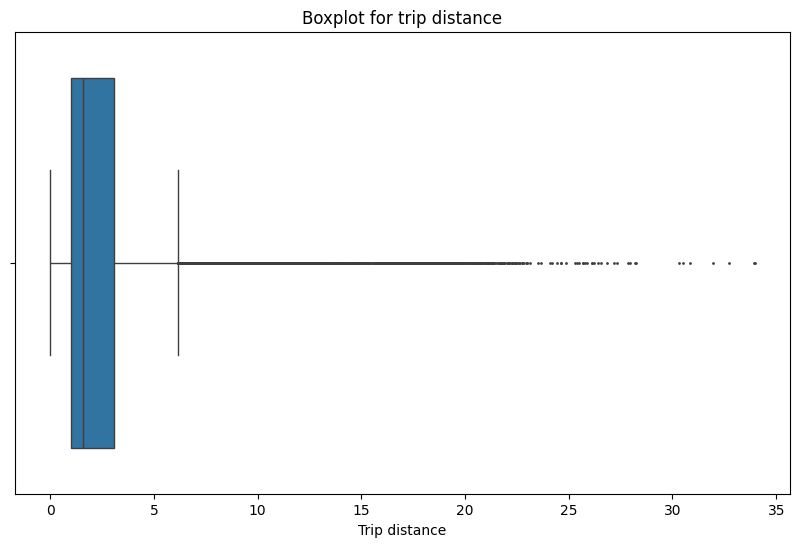

In [ ]:
# Create box plot of trip_distance
plt.figure(figsize=(10,6))

sns.boxplot(x = df['trip_distance'], fliersize=1)

plt.xlabel('Trip distance')
plt.title('Boxplot for trip distance')
plt.show()

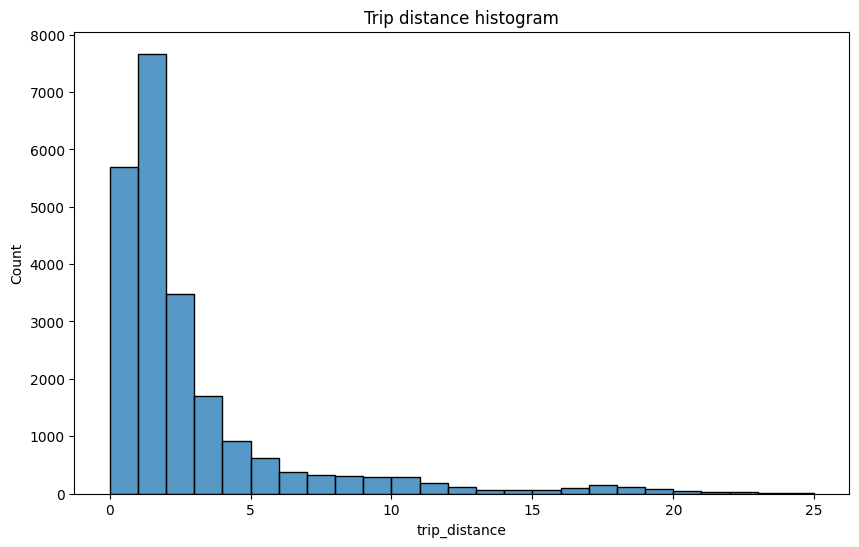

In [ ]:
# Create histogram of trip_distance
plt.figure(figsize=(10,6))

sns.histplot(x=df['trip_distance'],
             bins = range(0,26,1))

plt.title('Trip distance histogram')
plt.show()

**Note**: The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

**Total_amount**

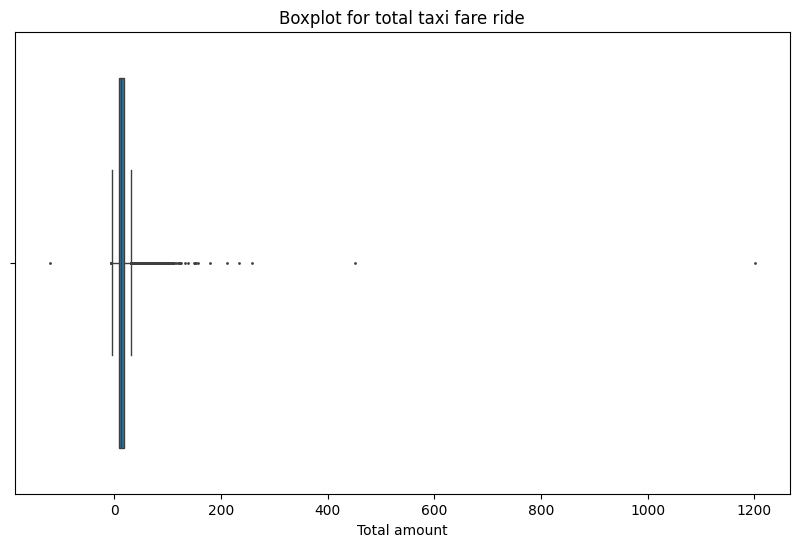

In [ ]:
# Create box plot of total_amount
plt.figure(figsize=(10,6))

sns.boxplot(x = df['total_amount'], fliersize=1)

plt.xlabel('Total amount')
plt.title('Boxplot for total taxi fare ride')
plt.show()

**Note:** The total cost of the trip also has a distribution that skews left, with cost falling in the negative range.
A taxi fare cannot have a negative value.

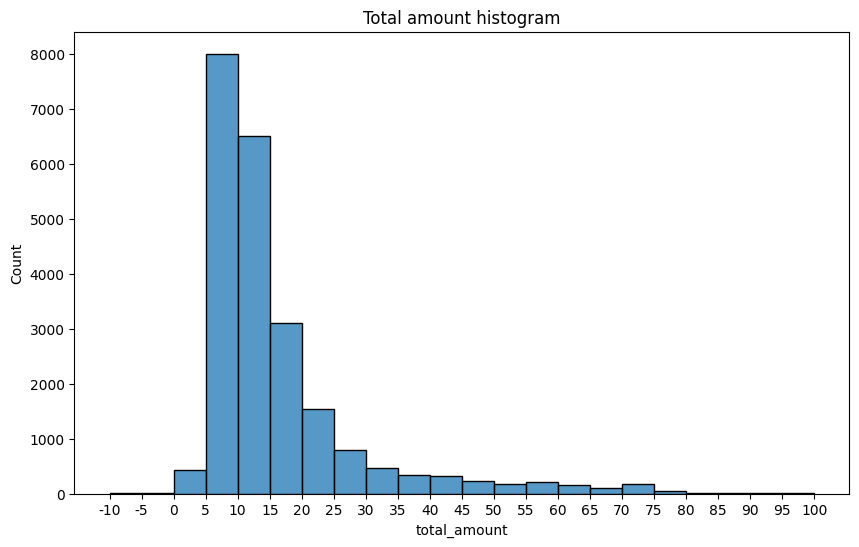

In [ ]:
# Create histogram of total_amount
plt.figure(figsize=(10,6))

ax = sns.histplot(x=df['total_amount'],
             bins = range(-10, 101, 5))

ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10, 101, 5))
plt.title('Total amount histogram')
plt.show()

**Note**: The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range

**Tip_amount**

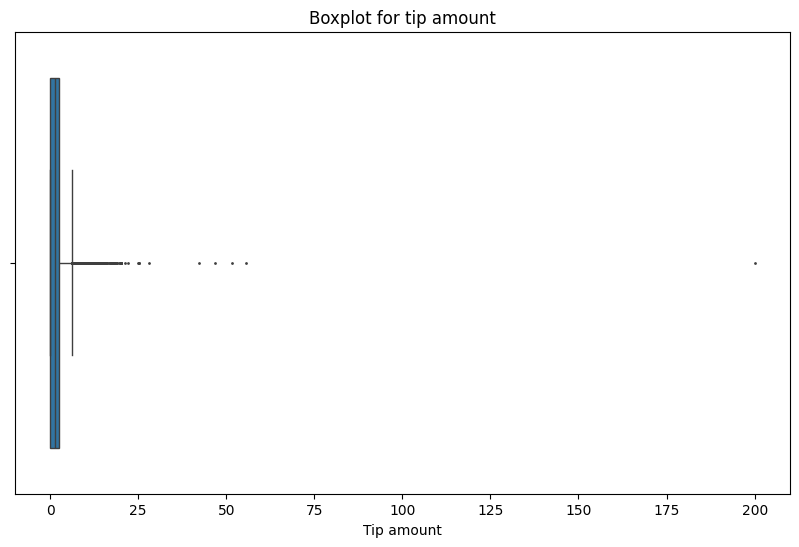

In [ ]:
# Create box plot of tip_amount
plt.figure(figsize=(10,6))

sns.boxplot(x = df['tip_amount'], fliersize=1)

plt.xlabel('Tip amount')
plt.title('Boxplot for tip amount')
plt.show()

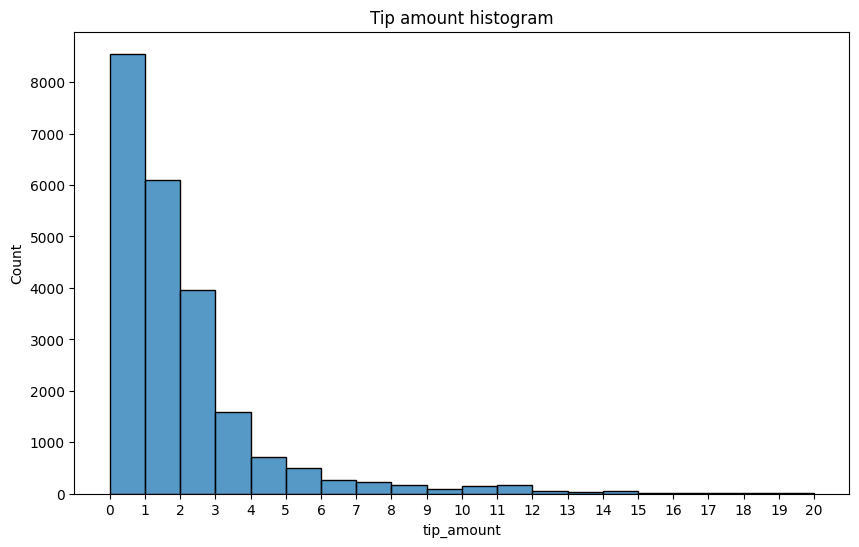

In [ ]:
# Create histogram of tip_amount
plt.figure(figsize=(10,6))

ax = sns.histplot(x=df['tip_amount'], bins = range(0,21,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount histogram')
plt.show()

**Note:** The distribtuion of tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**Tip amount by Vendor**

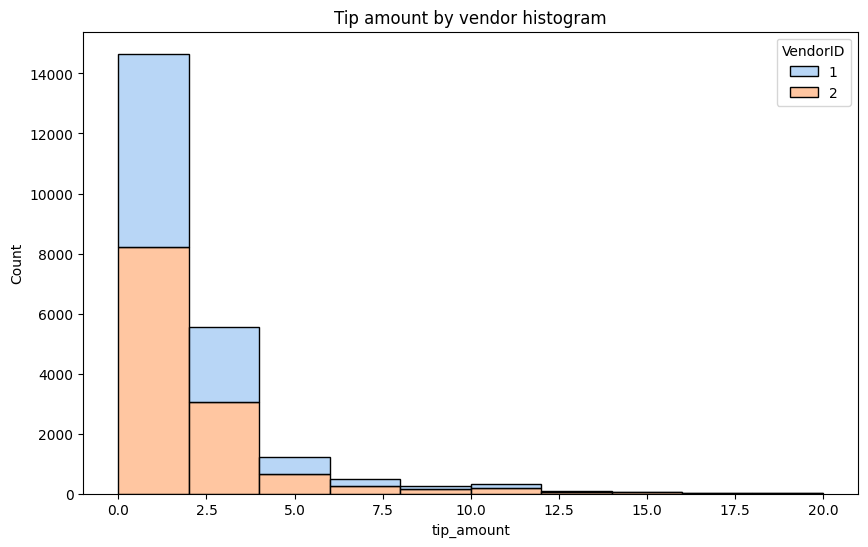

In [ ]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='tip_amount',
             bins=range(0,21,2),
             hue='VendorID',
             multiple='stack',
             palette='pastel'
            )

ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount by vendor histogram')
plt.show()

**Note**: Separating the tip amount by vendor reveals that there are no noticeable abberations in the distriubtion of tips between the two vendors in the dataset.
Vendor 2 has a slightly higher share of the rides, and this proportion is maintained for all tip amounts.

**Tip amount by Vendor for tips greater than $10**

Zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips

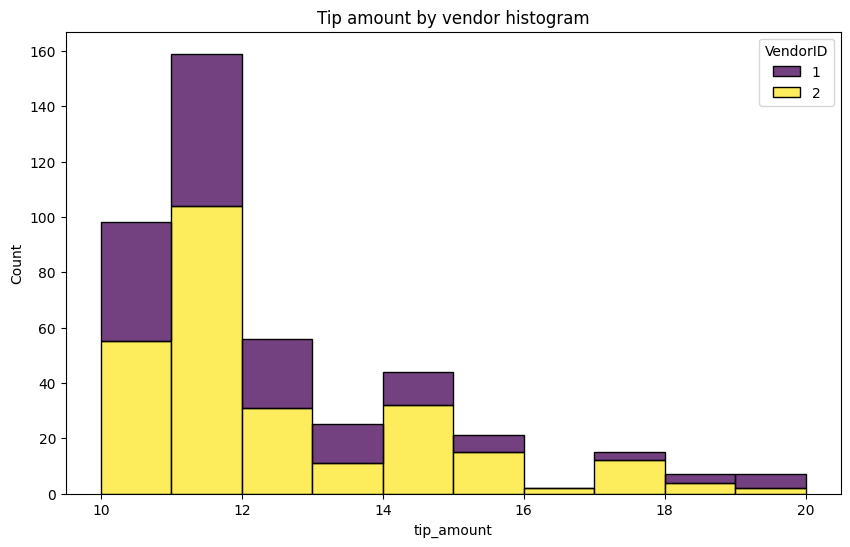

In [ ]:
# Create histogram of tip_amount by vendor for tips > $10

tips_over_10 = df[df['tip_amount'] > 10]

plt.figure(figsize=(10,6))

ax = sns.histplot(tips_over_10,
             x='tip_amount',
             bins=range(10,21,1),
             hue='VendorID',
             multiple='stack',
             palette='viridis')

ax.set_xticks(range(10,21,2))
ax.set_xticklabels(range(10,21,2))
plt.title('Tip amount by vendor histogram')
plt.show()

**Note**: The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Passenger_count**

In [ ]:
# Examine the unique values in the `passenger_count` column.
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Note:** Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers.
Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. This would likely be dropped unless a reasonable explanation can be found for them.

In [ ]:
# Calculate mean tips by passenger_count
mean_tips = df.groupby('passenger_count')['tip_amount'].mean().sort_values(ascending=False).reset_index()
print(mean_tips)

   passenger_count  tip_amount
0                0    2.135758
1                5    1.873185
2                2    1.856378
3                1    1.848920
4                6    1.720260
5                3    1.716768
6                4    1.530264


<ipython-input-31-1d01148742cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='passenger_count',


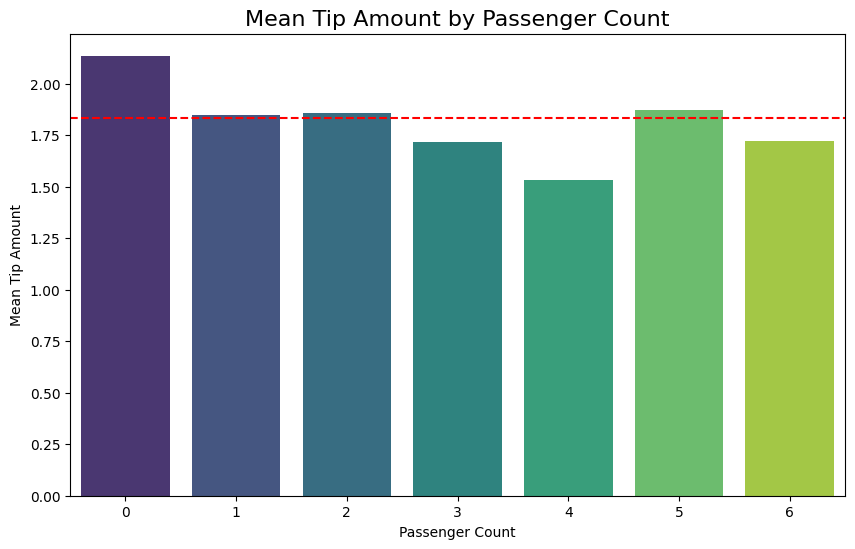

In [ ]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='passenger_count',
                 y='tip_amount',
                 data=mean_tips,
                 palette='viridis')
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend

plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')
plt.title('Mean Tip Amount by Passenger Count', fontsize=16)
plt.show()

**Note:** Mean tip amount varies very little by passenger count except for the 0 passenger occupancy count. Also, it does drop noticeably for four-passenger rides, it is expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Monthly rides**

In [ ]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [ ]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()

# Display the result
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [ ]:
# Reorder the monthly ride list so months go in order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)

# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

In [ ]:
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

<ipython-input-37-9daee1e4d5de>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order)


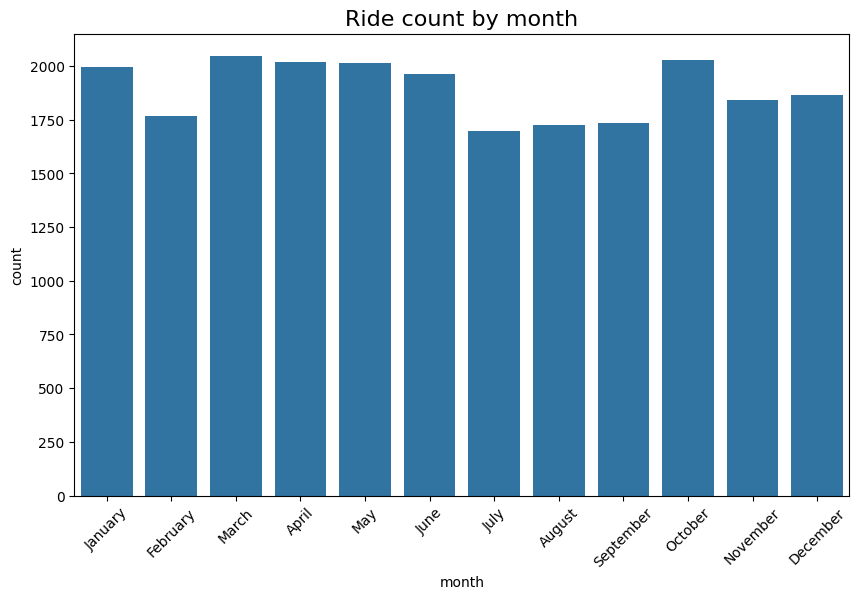

In [ ]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,6))

ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.xticks(rotation = 45)
plt.title('Ride count by month', fontsize=16);

**Note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September and also in February.

**Total Revenue by Month**

In [ ]:
# Repeat the process, this time for total revenue by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

total_revenue_by_month = df.groupby('month')[['total_amount']].sum()
total_revenue_by_month = total_revenue_by_month.reindex(index=month_order)
total_revenue_by_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total revenue by month')

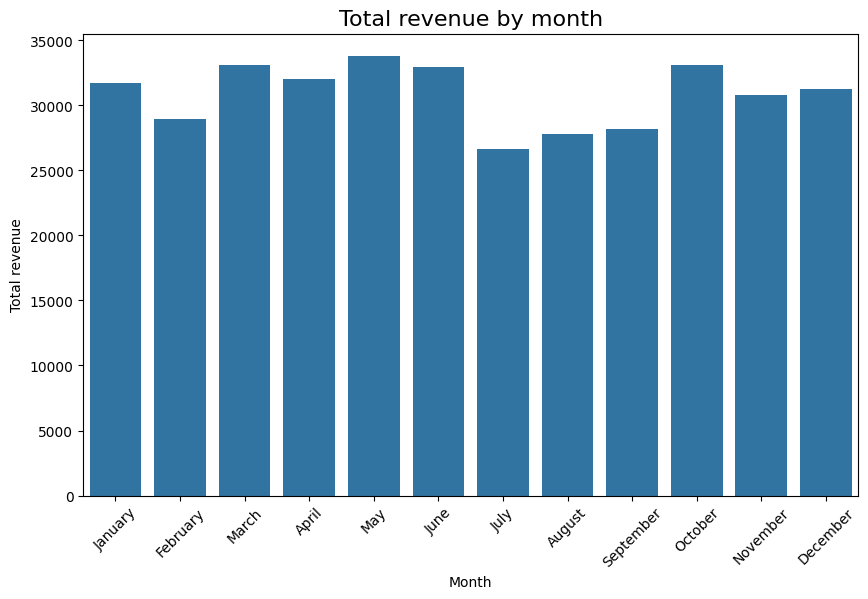

In [ ]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(10,6))

sns.barplot(x = total_revenue_by_month.index,
           y = total_revenue_by_month['total_amount'])

plt.xlabel('Month')
plt.ylabel('Total revenue')
plt.xticks(rotation = 45)
plt.title('Total revenue by month', fontsize = 16)

**Note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August and September, and also one in February.


**Daily rides**

In [ ]:
# Repeat the above process, this time for rides by day
total_rides_by_day = df['day'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_rides_by_day = total_rides_by_day.reindex(index = day_order)
total_rides_by_day

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

<ipython-input-41-ed8aa3e405ea>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Ride count by day')

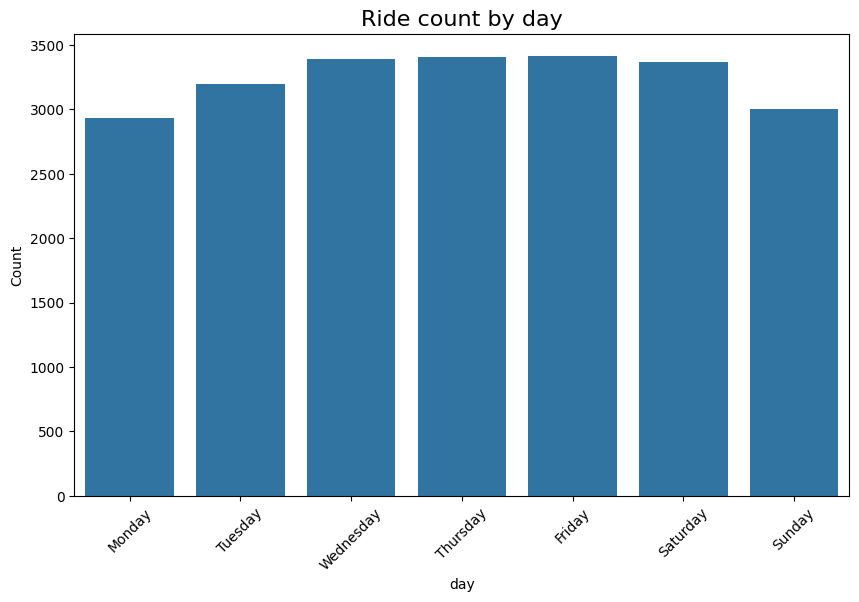

In [ ]:
# Create bar plot for ride count by day
plt.figure(figsize=(10, 6))

ax = sns.barplot(x = total_rides_by_day.index, y = total_rides_by_day)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Ride count by day', fontsize = 16)

**Note:** Surprisingly, Wednesday through Saturday had the higher number of daily rides, while Sunday and Monday had the least.

**Total Revenue by Day**

In [ ]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_revenue_by_day = df.groupby('day')[['total_amount']].sum()
total_revenue_by_day = total_revenue_by_day.reindex(index=day_order)
total_revenue_by_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


<ipython-input-43-7fa0c49cc659>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_order)


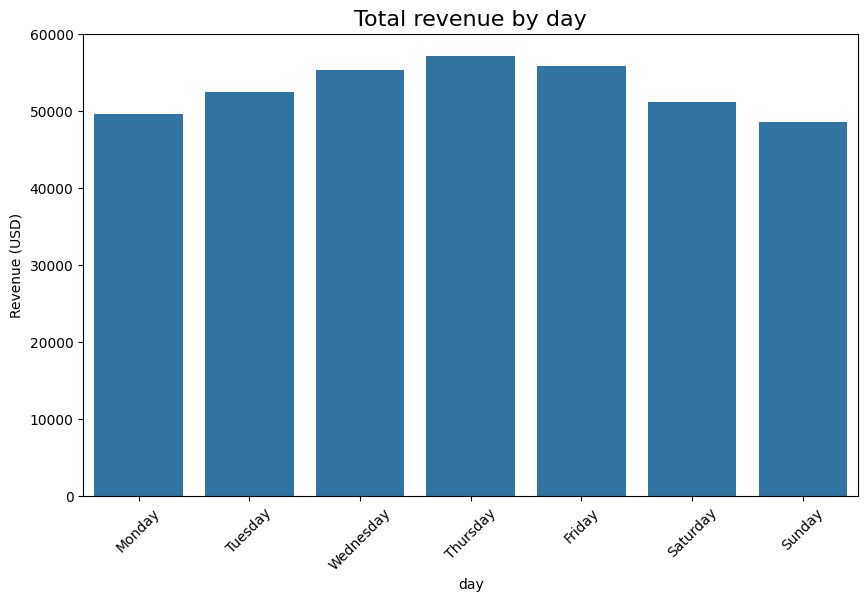

In [ ]:
# Create bar plot of total revenue by day
plt.figure(figsize=(10,6))

ax = sns.barplot(x=total_revenue_by_day.index,
            y=total_revenue_by_day['total_amount'])

ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.xticks(rotation = 45)
plt.title('Total revenue by day', fontsize=16)
plt.show()


**Note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's-more than a 10% drop.

**Drop-off Location IDs**

In [ ]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [ ]:
# Calculate the mean trip distance for each drop-off location and sort the results in descending order by mean trip distance

mean_trip_distance = df.groupby(df['DOLocationID'])[['trip_distance']].mean()
mean_trip_distance = mean_trip_distance.sort_values(by='trip_distance')
mean_trip_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


In [ ]:
# Show the index
mean_trip_distance.index

Index([207, 193, 237, 234, 137, 100, 236, 186, 249,  34,
       ...
       183, 259,  86, 219,   1,  51,  11, 210,  29,  23],
      dtype='int64', name='DOLocationID', length=216)

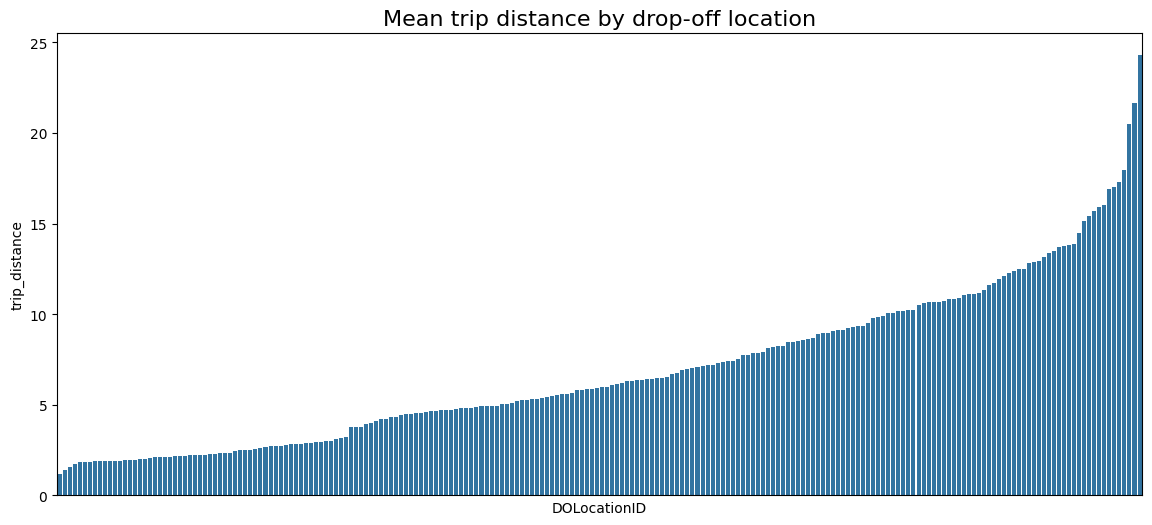

In [ ]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=mean_trip_distance.index,
                 y=mean_trip_distance['trip_distance'],
                 order=mean_trip_distance.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

**Note:** This plot represents a characteristic curve related to the cumulative density function of a normal distribution.

In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distribution of locations.

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location.

In [ ]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

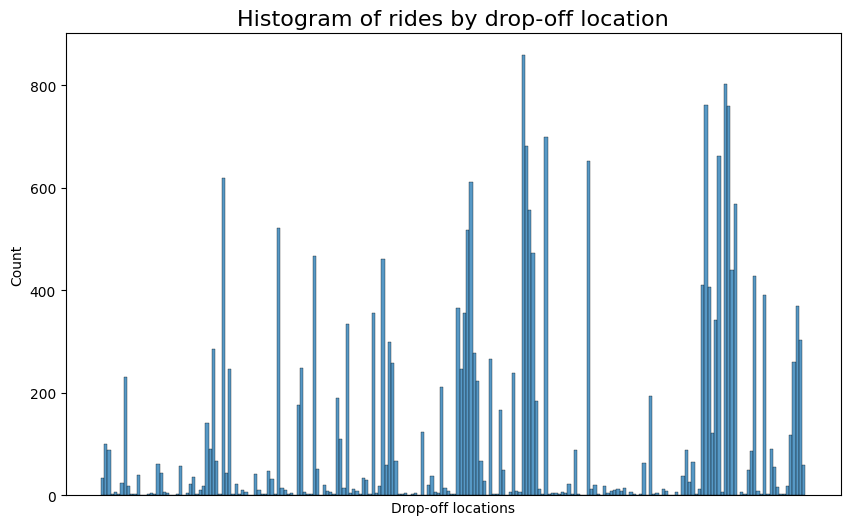

In [ ]:
# Histogram of rides by drop-off location
plt.figure(figsize=(10,6))

# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot the histogram
sns.histplot(sorted_dropoffs,
            bins = range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16)

**Note:** Out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic,while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

**Results and evaluation:**

Having built visualizations in Tableau and here in Python notebook, the results show that:
- The `total_amount` column has negative values in it, which seems suspicious.
A taxi fare cannot be negative.
- The highest distribution of `trip_distance` is below 5, but there are outliers all the way from ~22.5 to 35 miles.
- For columns`trip_distance` and `passenger_count`, wherein their values are Zero, the `fare amount` has been included.
- Several trips have a distance of "0.0". There are a total of 33 rides with occupancy count of "0.0" and the average of tip amount by passenger with an occupancy count of "0.0" is $2.13.

We can use that information from pickup and dropoff times to derive a trip duration for each line of data. This would likely be something that will help the client with their model.

## **Statistical Tests**

The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC:

***To analyze the relationship between fare amount and payment type.***

A follow-up email from Luana includes your specific assignment: To conduct an A/B test.  

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this project, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups:

1. Customers who are required to pay with credit card,
2. Customers who are required to pay with cash.

Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This phase has four parts:*

**Part 1:** Imports and data loading

Questions to consider:
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing

Questions to consider:
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

Questions to consider:
* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

The research question for this data project is,
**'Is there any relationship between the total fare amount and the payment type?**

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown

In [ ]:
# Load dataset into dataframe
taxi_data = pd.read_csv('/content/drive/MyDrive/2017_Yellow_Taxi_Trip_Data.csv', index_col = 0)

In [ ]:
# Gather descriptive statistics about the data
taxi_data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


To find out the relationship between payment type and fare amount paid by the customer. One approach is to look at the average fare amount for each payment type.

In [ ]:
# Average fare amount for each payment type
taxi_data.groupby(taxi_data['payment_type'])['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

**Note:** Based on the averages shown, it appears that customers who pay through **credit card** tend to **pay a larger fare amount** than customers who pay it in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, there is a need to conduct a hypothesis test.

The hypotheses for this project as listed below:

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.


The **goal** in this step is to conduct a two-sample t-test

1.   State the null hypothesis($H_0$) and the alternative hypothesis($H_A$)
2.   Choose a signficance level (5% significance level has been chosen)
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



**Note:** For this project, the hypothesis test is the main component of A/B test.

In [ ]:
significance_level = 0.05

credit_card = taxi_data[taxi_data['payment_type'] == 1]
cash = taxi_data[taxi_data['payment_type'] == 2]

stats.ttest_ind(a = credit_card['fare_amount'], b = cash['fare_amount'], equal_var = False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

**Note:**
- With a p-value (6.797) being less than 0.05 (as your significance level is 5%), I reject the null hypothesis in favor of the alternative hypothesis.

- I conclude that statistically there is a significant difference in the average fare amount between customers who use credit cards and customers who use cash.

**Communicate insights with the stakeholders:**

* The key business insight is that **encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.**
* This project requires an assumption that passengers were forced to pay one way or the other and that once informed of this requirement, they always complied with it.

The data was not collected this way; so an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for any other likely explanations.

For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.